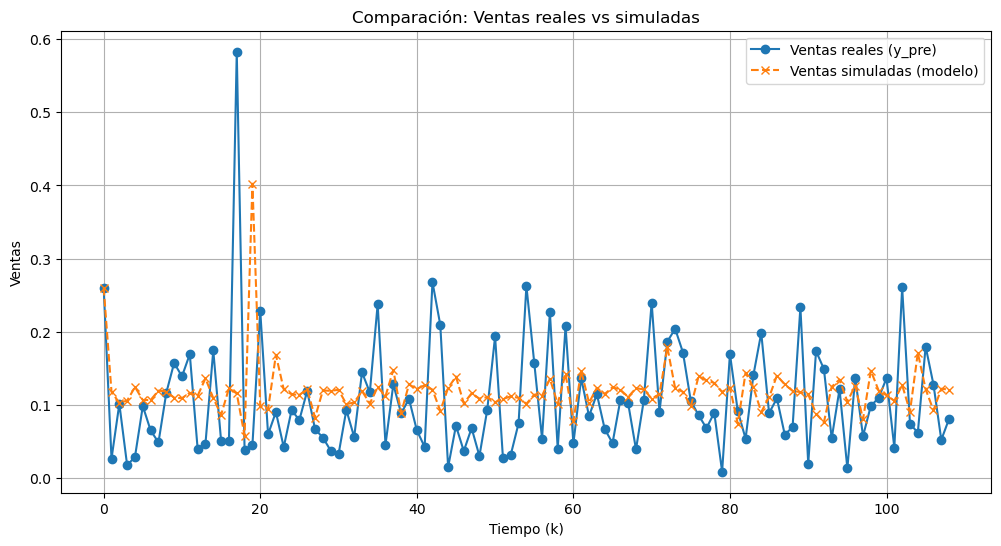

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Simulación datos originales
# 1. Cargar CSV
df = pd.read_csv("../ERP-POS-Data/TestValuesForSindyModel.csv")  # cambia por la ruta de tu archivo

# 2. Extraer columnas como arrays
rPicoBMA = df["rPicoBMA"].values
xUnd = df["xUnd"].values
nVtaCO = df["nVtaCO"].values
kVtaOCC = df["kVtaOCC"].values
lVtaNT = df["lVtaNT"].values
uPicoBin = df["uPicoBin"].values

# Variable predictora (ventas reales)
Ventas_real = df["y_pre"].values

# 3. Inicializamos las ventas simuladas
N = len(df)
Ventas_sim = np.zeros(N)
Ventas_sim[0] = Ventas_real[0]  # arranca desde el primer dato real

# 4. Simulación con el modelo dado
for k in range(N-1):
    Ventas_sim[k+1] = (
        0.099
        + 0.305 * nVtaCO[k]
        + 0.043 * lVtaNT[k]
        + 0.074 * Ventas_sim[k] * rPicoBMA[k]
        + 0.720 * Ventas_sim[k] * xUnd[k]
        - 0.819 * Ventas_sim[k] * nVtaCO[k]
        - 0.135 * Ventas_sim[k] * uPicoBin[k]
        - 0.069 * (rPicoBMA[k] ** 2)
        + 0.230 * rPicoBMA[k] * xUnd[k]
        - 0.520 * rPicoBMA[k] * nVtaCO[k]
        + 0.097 * rPicoBMA[k] * lVtaNT[k]
        - 0.533 * xUnd[k] * nVtaCO[k]
        - 0.255 * xUnd[k] * kVtaOCC[k]
        - 0.139 * xUnd[k] * uPicoBin[k]
        + 0.263 * (nVtaCO[k] ** 2)
        - 0.068 * nVtaCO[k] * kVtaOCC[k]
        + 0.199 * nVtaCO[k] * lVtaNT[k]
        + 0.303 * nVtaCO[k] * uPicoBin[k]
        + 0.272 * (kVtaOCC[k] ** 2)
        + 0.072 * kVtaOCC[k] * uPicoBin[k]
        - 0.146 * (lVtaNT[k] ** 2)
    )

# 5. Graficar resultados
plt.figure(figsize=(12,6))
plt.plot(Ventas_real, label="Ventas reales (y_pre)", marker='o')
plt.plot(Ventas_sim, label="Ventas simuladas (modelo)", marker='x', linestyle='--')
plt.xlabel("Tiempo (k)")
plt.ylabel("Ventas")
plt.title("Comparación: Ventas reales vs simuladas")
plt.legend()
plt.grid(True)
plt.show()
#could be adjusted

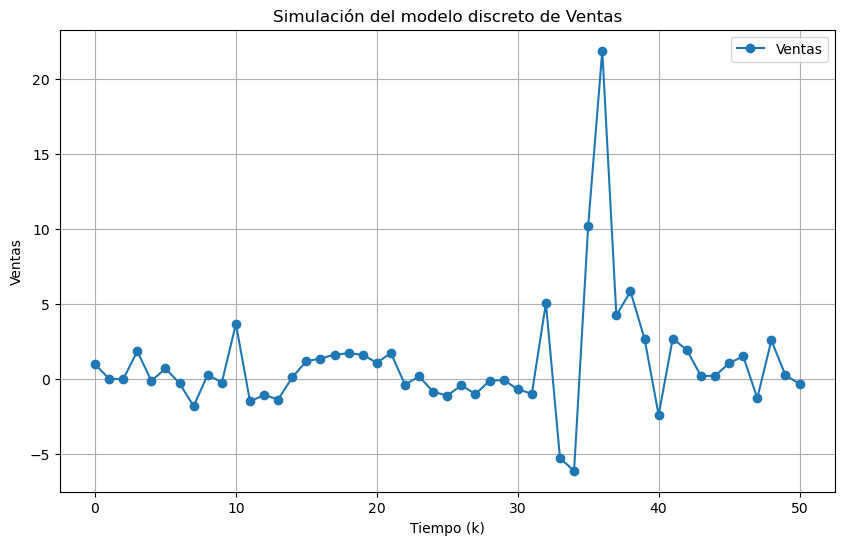

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Simulación datos aleatorios - RANDOM
# Número de pasos de simulación
N = 50  

# Generamos datos aleatorios para las variables de entrada
np.random.seed(42)  # para reproducibilidad
nVtaCO = np.random.randn(N)
lVtaNT = np.random.randn(N)
rPicoBMA = np.random.randn(N)
xUnd = np.random.randn(N)
kVtaOCC = np.random.randn(N)
uPicoBin = np.random.randn(N)

# Inicializamos las ventas
Ventas = np.zeros(N+1)  # una más porque calculamos [k+1]
Ventas[0] = 1  # condición inicial

# Simulación del modelo
for k in range(N):
    Ventas[k+1] = (
        0.099
        + 0.305 * nVtaCO[k]
        + 0.043 * lVtaNT[k]
        + 0.074 * Ventas[k] * rPicoBMA[k]
        + 0.720 * Ventas[k] * xUnd[k]
        - 0.819 * Ventas[k] * nVtaCO[k]
        - 0.135 * Ventas[k] * uPicoBin[k]
        - 0.069 * (rPicoBMA[k]**2)
        + 0.230 * rPicoBMA[k] * xUnd[k]
        - 0.520 * rPicoBMA[k] * nVtaCO[k]
        + 0.097 * rPicoBMA[k] * lVtaNT[k]
        - 0.533 * xUnd[k] * nVtaCO[k]
        - 0.255 * xUnd[k] * kVtaOCC[k]
        - 0.139 * xUnd[k] * uPicoBin[k]
        + 0.263 * (nVtaCO[k]**2)
        - 0.068 * nVtaCO[k] * kVtaOCC[k]
        + 0.199 * nVtaCO[k] * lVtaNT[k]
        + 0.303 * nVtaCO[k] * uPicoBin[k]
        + 0.272 * (kVtaOCC[k]**2)
        + 0.072 * kVtaOCC[k] * uPicoBin[k]
        - 0.146 * (lVtaNT[k]**2)
    )

# Graficar
plt.figure(figsize=(10,6))
plt.plot(Ventas, marker='o', label="Ventas")
plt.xlabel("Tiempo (k)")
plt.ylabel("Ventas")
plt.title("Simulación del modelo discreto de Ventas")
plt.grid(True)
plt.legend()
plt.show()
